> https://docs.pytorch.org/docs/stable/generated/torch.nn.Conv2d.html#torch.nn.Conv2d

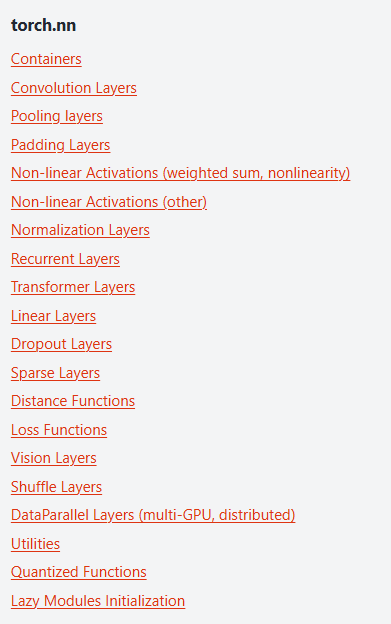

nn.conv2d

In [2]:
import torch

input = torch.tensor(
    [[1,2,0,3,1],
    [0,1,2,3,1],
    [1,2,1,0,0],
    [5,2,3,1,1],
    [2,1,0,1,1]])
kernel = torch.tensor([
    [1,2,1],
    [0,1,0],
    [2,1,0]])


print(input.shape)
print(kernel.shape)

torch.Size([5, 5])
torch.Size([3, 3])


In [4]:
input = torch.reshape(input, (1,1,5,5))
kernel = torch.reshape(kernel, (1,1,3,3))

print(input.shape)
print(kernel.shape)

torch.Size([1, 1, 5, 5])
torch.Size([1, 1, 3, 3])


1. stride(步进)

In [ ]:
import torch.nn.functional as F

output1 = F.conv2d(input, kernel, stride=1)
print(output1)

tensor([[[[10, 12, 12],
          [18, 16, 16],
          [13,  9,  3]]]])


In [6]:
output2 = F.conv2d(input, kernel, stride=2)
print(output2)

tensor([[[[10, 12],
          [13,  3]]]])


2. padding

In [8]:
output3 = F.conv2d(input, kernel, stride=1, padding=1)
print(output3)

tensor([[[[ 1,  3,  4, 10,  8],
          [ 5, 10, 12, 12,  6],
          [ 7, 18, 16, 16,  8],
          [11, 13,  9,  3,  4],
          [14, 13,  9,  7,  4]]]])


padding和stride的作用参见：
https://github.com/vdumoulin/conv_arithmetic/blob/master/README.md

## 卷积层

> class torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros', device=None, dtype=None)[source]


In [ ]:
import torch
import torchvision
from torch.utils.data import DataLoader
import torch.nn as nn
from torch.nn import Conv2d

dataset = torchvision.datasets.CIFAR10(
    '/root/autodl-tmp/pytorch_DeepLearning/dataset/CIFAR10',
    train=True,
    transform=torchvision.transforms.ToTensor(),
    download=True
    )

dataloader = DataLoader(dataset, batch_size=64)

class myClass(nn.Module):
    def __init__(self):
        super(myClass,self).__init__()
        self.conv1 = Conv2d(in_channels=3, out_channels=6, kernel_size=3, stride=1, padding=0)

    def forward(self,x):
        x = self.conv1(x)
        return x
    
tudui = myClass()
print(tudui)

Files already downloaded and verified
myClass(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
)


In [ ]:
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter("logs")
step = 0
for data in dataloader:
    imgs, targets = data        # img torch.Size([64, 3, 32, 32])
    output = tudui(imgs)        # output torch.Size([64, 6, 30, 30])
    writer.add_images("input", imgs, step)    

    output = torch.reshape(output,(-1,3,30,30)) # 必须是3个channel才可以显示，所以需要reshape一下
    writer.add_images("output", output, step)  # output torch.Size([64, 6, 30, 30])
    step = step + 1
    # print(imgs.shape, output.shape)


writer.close()